#  Imports

In [6]:
import time

import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import time
import data_processor1 as dp


# Data processing

Importing gpu power data as gpu and total power data as total.

In [10]:
gpu = dp.cleaner('C:/Users/sera/Documents/Project/Data/gpupower.csv') #edit this path
total = pd.read_csv('C:/Users/sera/Documents/Project/Data/totalpower.csv') #edit this path

# Strip whitespace from Time column
gpu['Time'] = gpu['Time'].str.strip()

gpu['Index'] = np.arange(0, len(gpu))
total['Index'] = np.arange(0, len(total))

# cleans the time from HH:MM:SS into an epoch float
gpu['Epoch'] = dp.tcleaner(gpu['Time'])
total['Epoch'] = dp.tcleaner(total['Time'])

# Merge on 'Time' (inner join to drop mismatches)
complete = pd.merge(gpu, total, on='Time', how='inner', suffixes=('_gpu', '_total'))


Making a nice line graph of the total power:

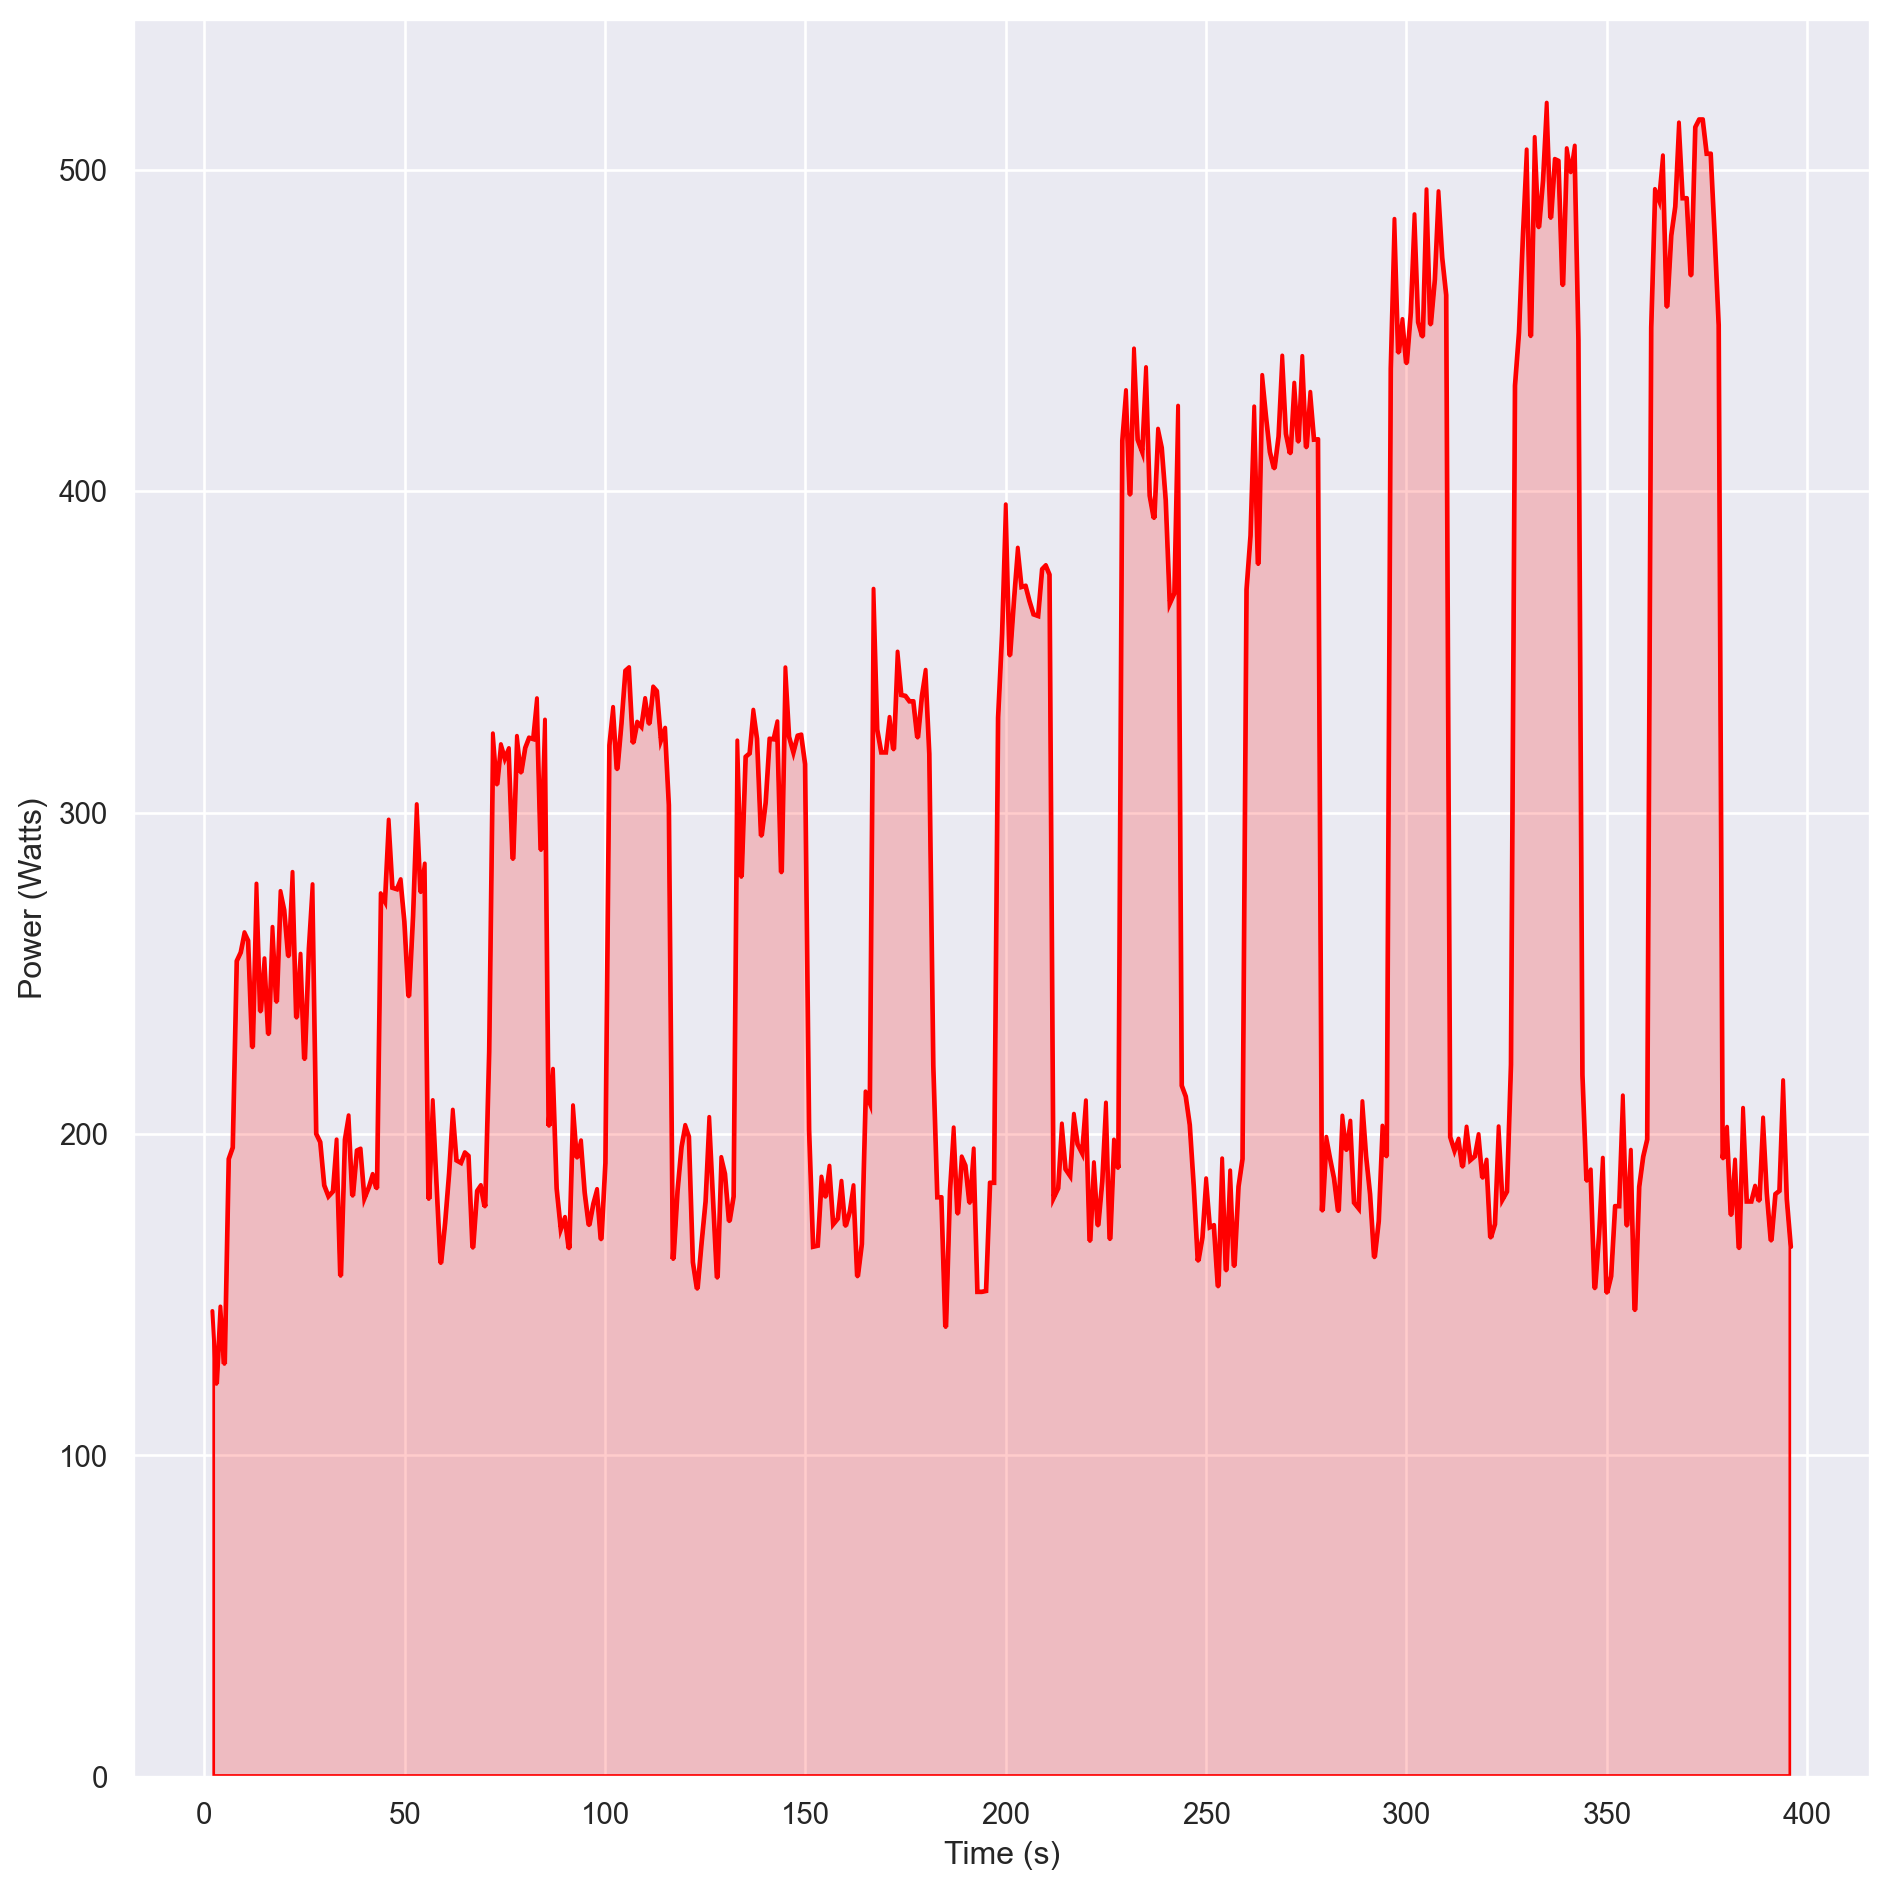

In [15]:
so.Plot(data=complete, x='Index_gpu', y='Watts').add(so.Lines(color='Red')).limit().add(so.Area(color='Red')).layout(size=(10,10)).save(
    'Data/Total_power_figure').label(
    x = 'Time (s)', y = 'Power (Watts)'
)

Doing the same with gpu power:

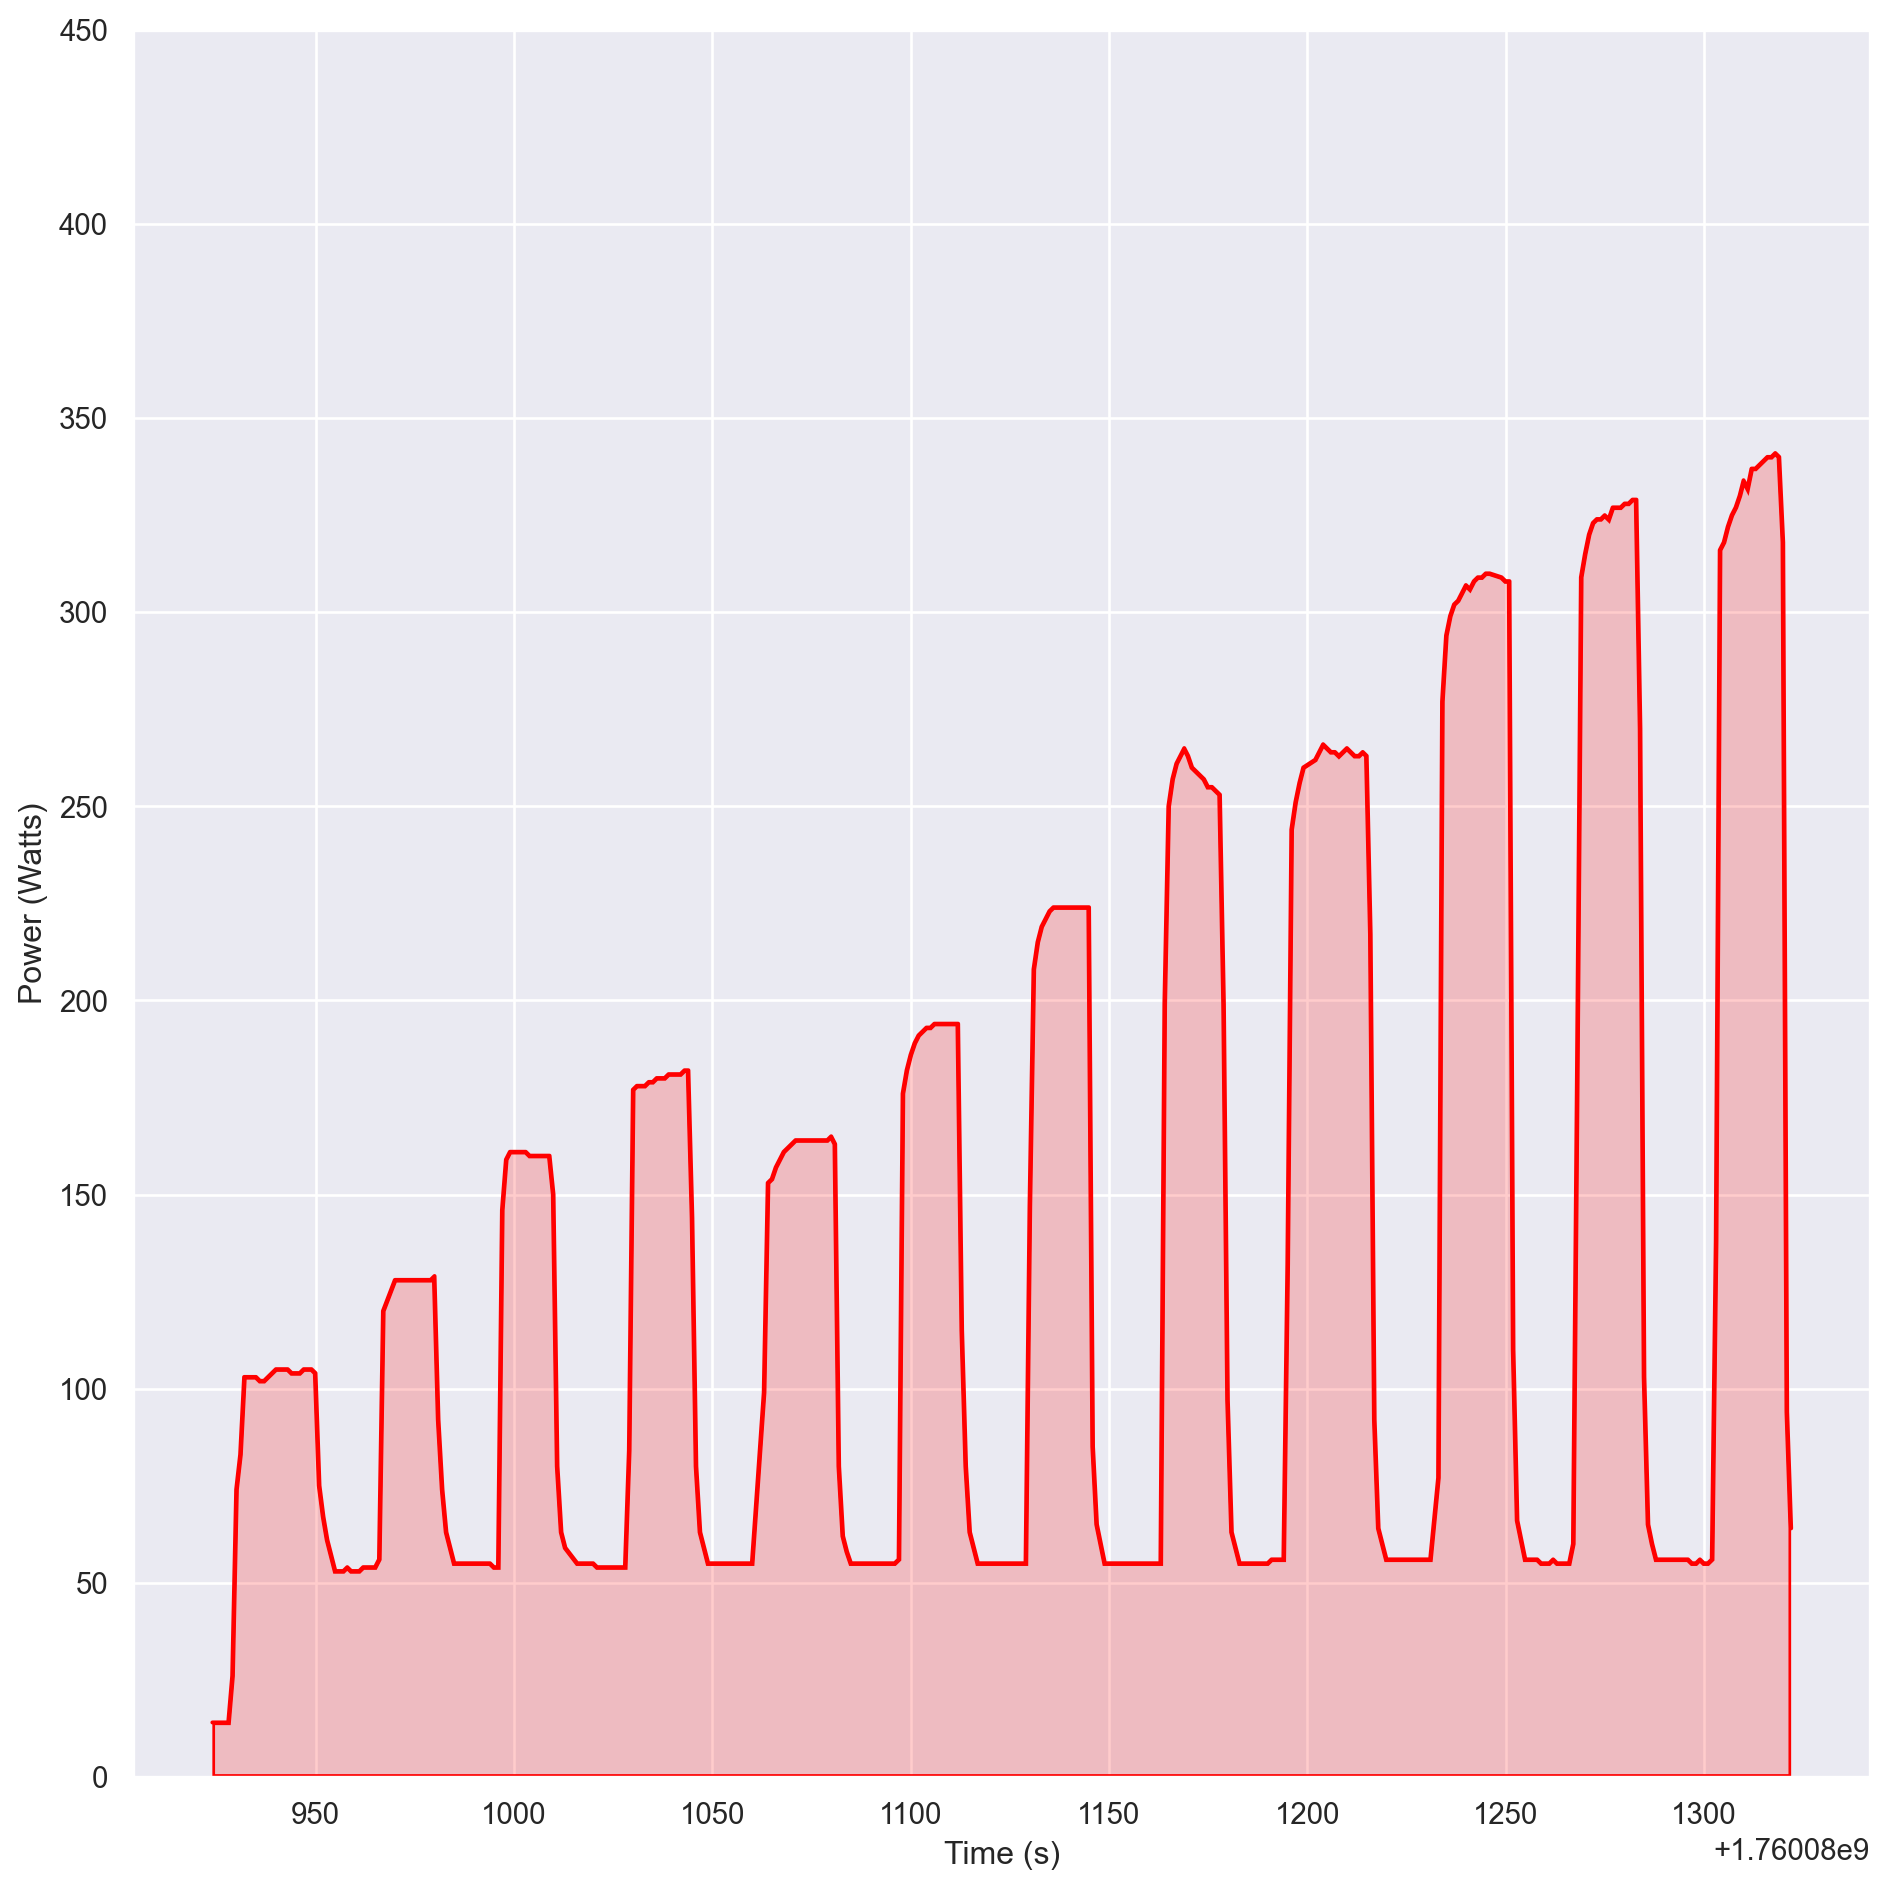

In [12]:
so.Plot(data=gpu, x='Epoch', y='Power').add(so.Lines(color='Red')).limit(y=(0,450)).add(so.Area(color='Red')).layout(size=(10,10)).save(
    'Data/gpu_power_figure').label(
    x = 'Time (s)', y = 'Power (Watts)'
)

Stacking the graphs to see how much power CPU is consuming:

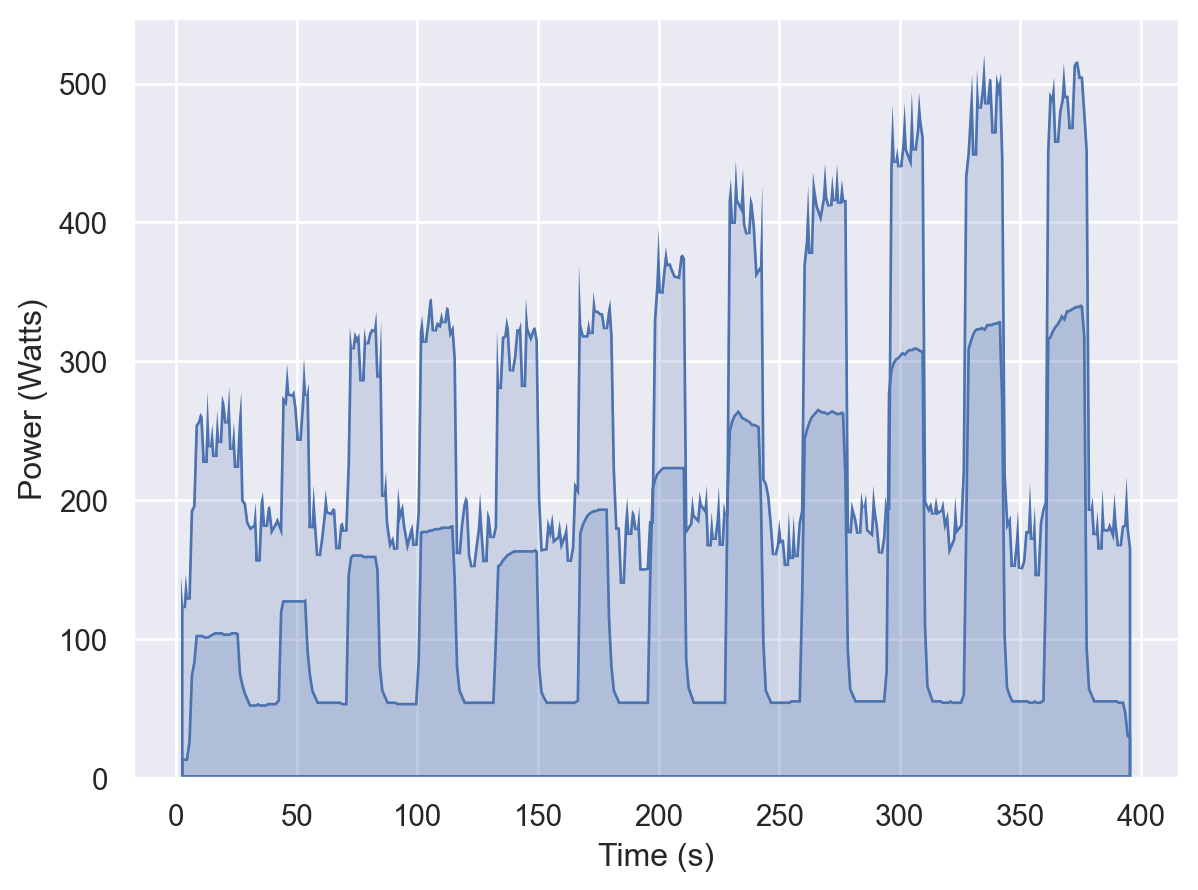

In [17]:
so.Plot(data=complete, x='Index_gpu').add(so.Area(), y='Power').add(so.Area(), y='Watts').label(
    x='Time (s)', y='Power (Watts)'
).save('Data/complete_power_figure')